# Task 02

#### Perform data cleaning and EDA on the titanic dataset. Explore the relationship between variables and identify patterns and trends in the data

# Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading the Dataset

In [9]:
titanic = pd.read_csv(r'C:\Users\USER\Documents\titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Examining the Data

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin column has too many missing values so it will be dropped. The Ticket column will also be dropped because the values are not so relevant to this analysis

In [19]:
titanic.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# Handling the missing values

In [22]:
titanic['Embarked'] = titanic['Embarked'].replace({np.nan: 'S'})
titanic['Embarked'].isna().sum()

0

In [24]:
titanic['Age'].isna().sum()

177

<Axes: xlabel='Pclass', ylabel='Age'>

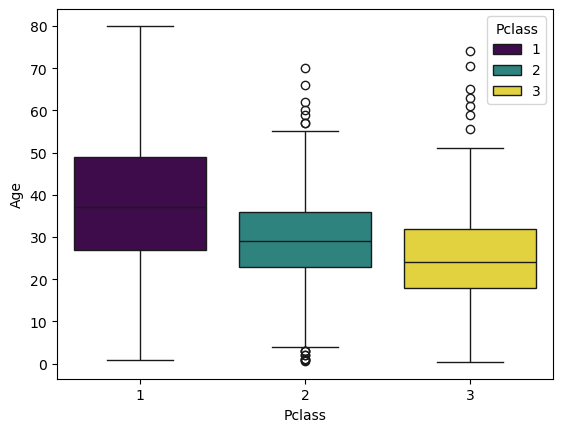

In [26]:
sns.boxplot(y = titanic['Age'].dropna(), x = titanic['Pclass'], palette = 'viridis', hue = titanic['Pclass'])

In [28]:
#Age replacements based on Pclass
age_replacement = {1: 38, 2: 29, 3: 27}

# Replacing NaN values in 'Age' using 'Pclass'
titanic['Age'] = titanic.apply(
    lambda row: age_replacement[row['Pclass']] 
    if np.isnan(row['Age']) 
    else row['Age'],
    axis=1
)

In [32]:
titanic['Age'].isna().sum()

0

In [36]:
# Converting categorical variables to category type
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

# Exploratory Data Analysis (EDA)

### Univariate Analysis

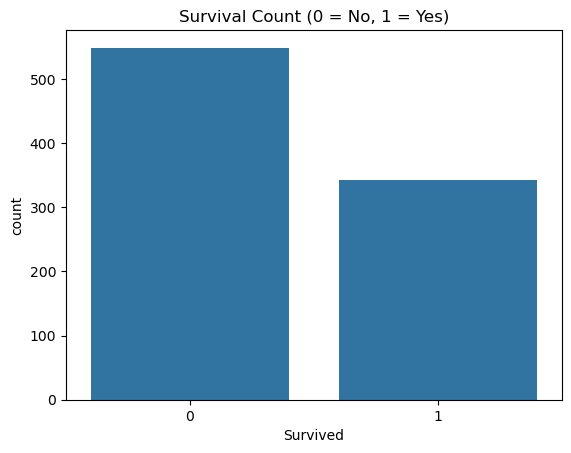

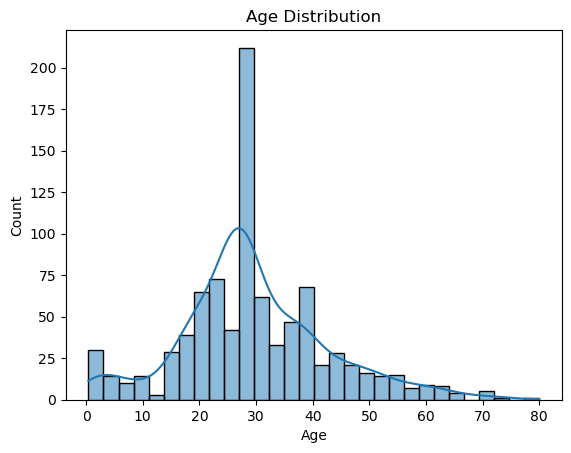

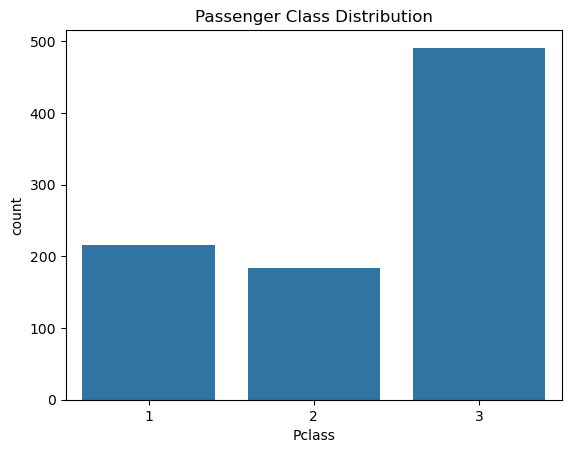

In [38]:
# Survival Count
sns.countplot(x='Survived', data=titanic)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Age Distribution
sns.histplot(titanic['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Passenger Class Distribution
sns.countplot(x='Pclass', data=titanic)
plt.title("Passenger Class Distribution")
plt.show()

### Bivariate Analysis

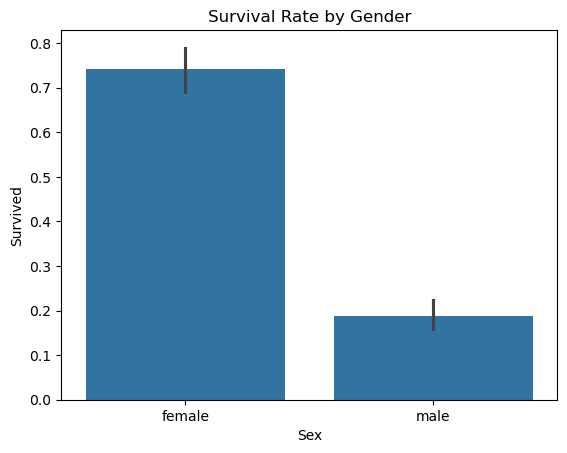

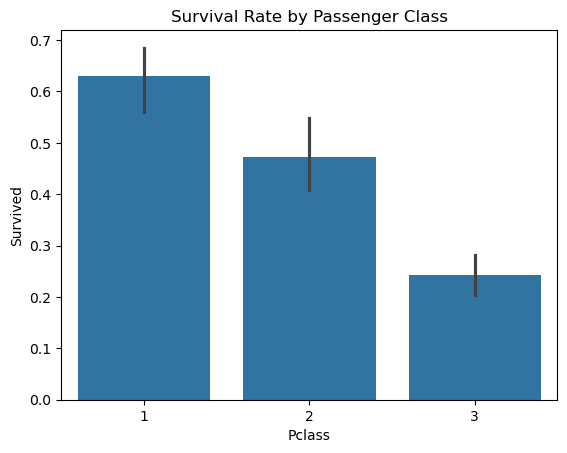

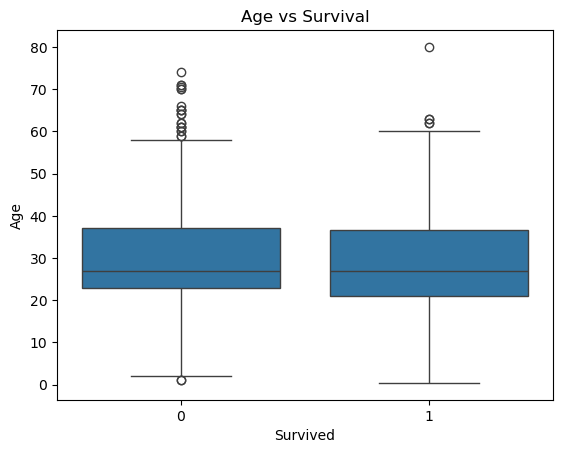

In [43]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.show()

# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title("Age vs Survival")
plt.show()

### Multivariate Analysis

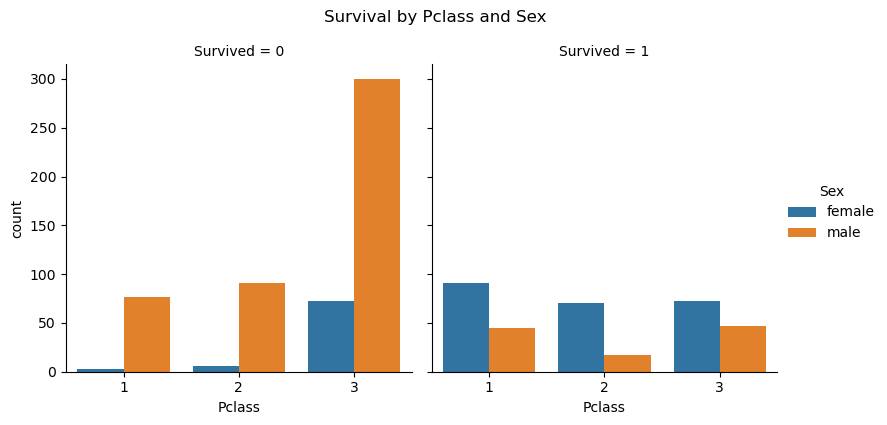

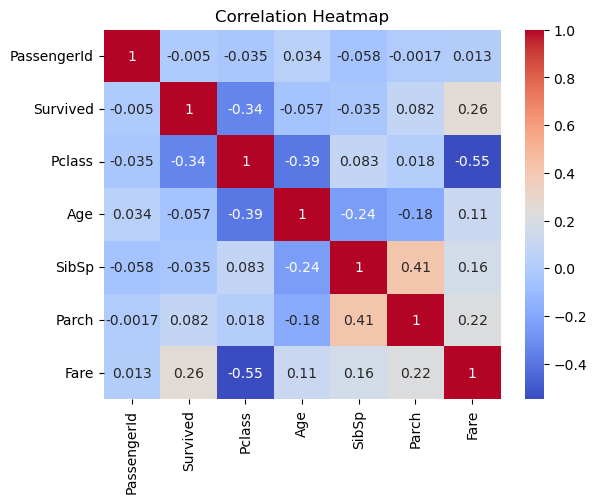

In [48]:
# Survival by Pclass and Sex
sns.catplot(x='Pclass', hue='Sex', col='Survived',
            data=titanic, kind='count', height=4, aspect=1)
plt.suptitle("Survival by Pclass and Sex", y=1.05)
plt.show()

# Correlation Heatmap
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### **Summary of Titanic Dataset Analysis**  

This analysis of the Titanic dataset aimed to explore relationships between passenger characteristics and survival rates. I conducted data cleaning and exploratory data analysis (EDA) to derive key insights.  

---

## **Key Findings & Insights**  

### **1. Survival Rate Overview**  
- Out of **891 passengers**, only **38.4% (342 people) survived**, while **61.6% (549 people) perished**.  
- This shows that survival was not random, and certain factors played a role in determining who lived and who didn’t.  

---

### **2. Gender & Survival Relationship**  
- **Females had a significantly higher survival rate (~74%) compared to males (~19%)**.  
- This supports the well-known "Women and children first" policy.  
- Most male passengers did not survive, particularly those in lower classes.  

| Gender  | Survival Rate |
|---------|--------------|
| Female  | ~74%        |
| Male    | ~19%        |

---

### **3. Passenger Class & Survival**  
- **First-class passengers had a much higher survival rate (~63%) than third-class passengers (~24%)**.  
- This suggests wealth and social status played a major role in survival chances.  
- **Third-class passengers had the lowest survival rate,** as many were in lower decks and had less access to lifeboats.  

| Class | Survival Rate |
|-------|--------------|
| 1st   | ~63%        |
| 2nd   | ~47%        |
| 3rd   | ~24%        |

---

### **4. Age & Survival**  
- Younger passengers (especially **children under 10**) had a much higher survival rate.  
- **Median age of survivors was lower than non-survivors**, confirming that younger individuals had a better chance.  
- Many **older passengers (above 50)** did not survive, likely due to physical limitations in reaching lifeboats.  

---

### **5. Family Size & Survival**  
- Passengers traveling **alone had a lower survival rate** than those with family members.  
- Large families (with more than 4-5 members) had lower survival rates, possibly because it was harder to stay together and find lifeboats.  
- Small families (2-4 members) had the highest survival chances.  

---

### **6. Embarkation Port & Survival**  
- Passengers who embarked from **Cherbourg (C)** had a higher survival rate (~55%) compared to Southampton (~34%).  
- This could be because many first-class passengers boarded from Cherbourg.  

| Embarked | Survival Rate |
|----------|--------------|
| Cherbourg (C) | ~55% |
| Queenstown (Q) | ~39% |
| Southampton (S) | ~34% |

---

### **7. Fare & Socioeconomic Status**  
- Higher fare prices correlated with higher survival rates.  
- **Passengers who paid more for tickets (~$80 or more) had a much better chance of surviving** compared to those who paid lower fares (~$10-$20).  
- This suggests **wealthier individuals had better access to lifeboats**.  

---

## **Conclusion & Key Takeaways**  
1. **Gender was the strongest predictor of survival** – Women had a much higher chance of survival than men.  
2. **First-class passengers had a significant survival advantage**, indicating social class played a critical role.  
3. **Children had a better chance of survival than older individuals**.  
4. **Traveling with family members slightly increased survival chances**, but large family groups had lower survival rates.  
5. **Wealthier passengers (higher fares) were more likely to survive**, possibly due to easier access to lifeboats.  
6. **Passengers from Cherbourg had better survival rates**, likely due to more first-class passengers boarding there.  

---

### **Next Steps for Further Analysis**  
- **Predictive Modeling**: Use Machine Learning (Logistic Regression, Decision Trees) to predict survival.  
- **Feature Engineering**: Analyze ticket numbers or cabin locations for more insights.  
- **Advanced Statistical Tests**: Use hypothesis testing to confirm observed trends.  

---

This analysis reveals that **survival on the Titanic was not random but strongly influenced by factors like gender, class, age, and ticket price**.